In [122]:
import numpy as np
import pandas as pd
import datetime
from scipy.stats import norm
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

In [2]:
ba = pd.read_csv('BA-bloomberg.csv')
noc = pd.read_csv('NOC-bloomberg.csv')

In [3]:
# transform string to datetime object, aufpassen mit den genauen definitionen der anteile: %m/%d/%Y -> Y für 2022, net 22

ba['Dates'] = [datetime.datetime.strptime(d, '%m/%d/%Y') for d in ba["Dates"]]
noc['Dates'] = [datetime.datetime.strptime(d, '%m/%d/%Y') for d in noc["Dates"]]

# 1.)

In [4]:
# create port value for stocks 

ba['port_val'] = ba.PX_LAST * 134
noc['port_val'] = noc.PX_LAST * 166

In [5]:
# port dataframe 

port = pd.DataFrame([ba.port_val, noc.port_val]).transpose()
port['port_ges'] = ba.port_val + noc.port_val

# calc log port returns 
port['port_ges'] = np.log(port['port_ges']) - np.log(port['port_ges'].shift(-1))

port['Dates'] = ba['Dates']

In [6]:
######## Port mean and var for 2, 5, 10 moving window 

# set index for rolling
port = port.set_index('Dates')
port2 = port.sort_index()

############################## 

# calc port sd 2 year window
port_sigma2 = port2.rolling('730d').std().shift(1)
port_sigma_new2 = port_sigma2[port_sigma2.index > '1999-02-05']
# Adjust sd
port_sigma_new2['port_ges'] = port_sigma_new2['port_ges'] * np.sqrt(252)

# calc port mean 2 year window 
port_mu2 = port2.rolling('730d').mean().shift(1)
port_mu_new2 = port_mu2[port_mu2.index > '1999-02-05']
# Adjust mu
port_mu_new2['port_ges'] = port_mu_new2['port_ges'] * 252 + 0.5 * (port_sigma_new2['port_ges']**2)

# calc port sd 5 year window
port_sigma5 = port2.rolling('1825d').std().shift(1)
port_sigma_new5 = port_sigma5[port_sigma5.index > '1999-02-05']
# Adjust sd
port_sigma_new5['port_ges'] = port_sigma_new5['port_ges'] * np.sqrt(252)

# calc port mean 5 year window 
port_mu5 = port2.rolling('1825d').mean().shift(1)
port_mu_new5 = port_mu5[port_mu5.index > '1999-02-05']
# Adjust mu
port_mu_new5['port_ges'] = port_mu_new5['port_ges'] * 252 + 0.5 * (port_sigma_new5['port_ges']**2)

# calc port sd 10 year window
port_sigma10 = port2.rolling('3650d').std().shift(1)
port_sigma_new10 = port_sigma10[port_sigma10.index > '1999-02-05']
# Adjust sd
port_sigma_new10['port_ges'] = port_sigma_new10['port_ges'] * np.sqrt(252)

# calc port mean 10 year window 
port_mu10 = port2.rolling('3650d').mean().shift(1)
port_mu_new10 = port_mu10[port_mu10.index > '1999-02-05']
# Adjust mu
port_mu_new10['port_ges'] = port_mu_new10['port_ges'] * 252 + 0.5 * (port_sigma_new10['port_ges']**2)

/var/folders/sn/xxr4rfmj23100534fjn99hv80000gn/T/ipykernel_97008/1236945402.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_sigma_new2['port_ges'] = port_sigma_new2['port_ges'] * np.sqrt(252)
/var/folders/sn/xxr4rfmj23100534fjn99hv80000gn/T/ipykernel_97008/1236945402.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_mu_new2['port_ges'] = port_mu_new2['port_ges'] * 252 + 0.5 * (port_sigma_new2['port_ges']**2)
/var/folders/sn/xxr4rfmj23100534fjn99hv80000gn/T/ipykernel_97008/1236945402.py:25:

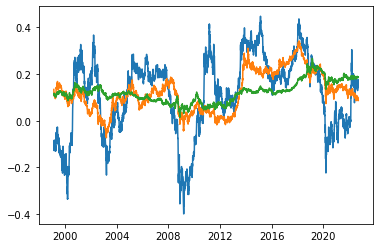

In [7]:
########################## plots for 2, 5, 10 moving window 

##### plots for 2, 5 and 10 moving window mu
plt.plot(port_mu_new2['port_ges'])
plt.plot(port_mu_new5['port_ges'])
plt.plot(port_mu_new10['port_ges'])

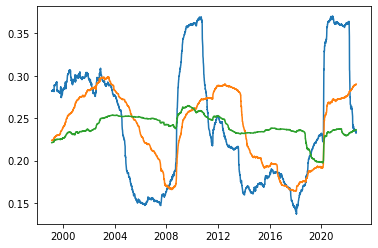

In [8]:
########################## plots for 2, 5, 10 moving window 

##### plots for 2, 5 and 10 moving window sigma
plt.plot(port_sigma_new2['port_ges'])
plt.plot(port_sigma_new5['port_ges'])
plt.plot(port_sigma_new10['port_ges'])

In [ ]:
# mu estimates for 2 years noisy and becomes more stable. for 5 and 10 years closer to each other. var estimates more continous.

In [9]:
######## Port mean and var for moving average with lambda1, lambda2 and lambda3

lambda1 = 0.9972531953
lambda2 = 0.9989003714
lambda3 = 0.9994500345

# expo weight for lambda1
rolling_exponential_mean1 = port2.ewm(alpha = 1 - lambda1).mean().shift(1)
rolling_exponential_std1 = port2.ewm(alpha = 1 - lambda1).std().shift(1)

# expo weight for lambda2
rolling_exponential_mean2 = port2.ewm(alpha = 1 - lambda2).mean().shift(1)
rolling_exponential_std2 = port2.ewm(alpha = 1 - lambda2).std().shift(1)

# expo weight for lambda3
rolling_exponential_mean3 = port2.ewm(alpha = 1 - lambda3).mean().shift(1)
rolling_exponential_std3 = port2.ewm(alpha = 1 - lambda3).std().shift(1)

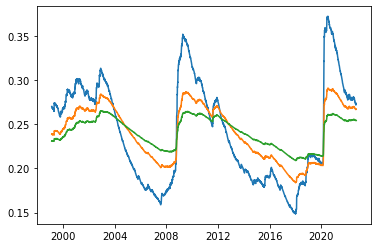

In [10]:
############# plot sigma for lambda1, lambda2 and lambda3 expo weight

rolling_exponential_std1_new = rolling_exponential_std1[rolling_exponential_std1.index > "1999-02-05"]["port_ges"]
# adjust std
rolling_exponential_std1_new = rolling_exponential_std1_new * np.sqrt(252)

rolling_exponential_std2_new = rolling_exponential_std2[rolling_exponential_std2.index > "1999-02-05"]["port_ges"]
# adjust std
rolling_exponential_std2_new = rolling_exponential_std2_new * np.sqrt(252)

rolling_exponential_std3_new = rolling_exponential_std3[rolling_exponential_std3.index > "1999-02-05"]["port_ges"]
# adjust std
rolling_exponential_std3_new = rolling_exponential_std3_new * np.sqrt(252)

plt.plot(rolling_exponential_std1_new)
plt.plot(rolling_exponential_std2_new)
plt.plot(rolling_exponential_std3_new)

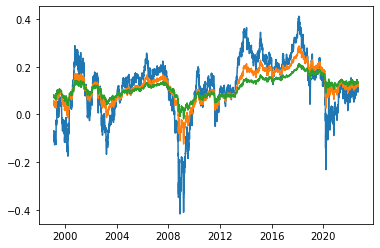

In [11]:
############# plot mu for lambda1, lambda2 and lambda3 expo weight

rolling_exponential_mean1_new = rolling_exponential_mean1[rolling_exponential_mean1.index > "1999-02-05"]["port_ges"]
# adjust mu
rolling_exponential_mean1_new = 252 * rolling_exponential_mean1_new + 0.5 * (rolling_exponential_std1_new**2)

rolling_exponential_mean2_new = rolling_exponential_mean2[rolling_exponential_mean2.index > "1999-02-05"]["port_ges"]
# adjust mu
rolling_exponential_mean2_new = 252 * rolling_exponential_mean2_new + 0.5 * (rolling_exponential_std2_new**2)

rolling_exponential_mean3_new = rolling_exponential_mean3[rolling_exponential_mean3.index > "1999-02-05"]["port_ges"]
# adjust mu
rolling_exponential_mean3_new = 252 * rolling_exponential_mean3_new + 0.5 * (rolling_exponential_std3_new**2)

plt.plot(rolling_exponential_mean1_new)
plt.plot(rolling_exponential_mean2_new)
plt.plot(rolling_exponential_mean3_new)

In [ ]:
# more spreads for lower time window. var estimate more stable and continous. Right shifted estimate for sd. Gets less noisy.

# 2.)

# 2.1) -> First approach 

In [12]:
# var for gbm stock 

def VaR_gbm(s0, mu, sigma, t, p):
    
    icdf = norm.ppf(1-p)
    v1 = sigma*(t**0.5)*icdf + (mu - (sigma**2)/2)*t
    v = s0 - s0 * np.exp(v1)
    
    return v

In [13]:
def calc_X(s0_x, mu_x, sigma_x, T_x, p_x):
    
    v_x = s0_x - VaR_gbm(s0_x, mu_x, sigma_x, T_x, p_x)
    
    return v_x

In [14]:
def calc_d1(s0, mu, sigma, T, X):
    
    d1 = 1 / (sigma * np.sqrt(T)) * (np.log(s0 / X) + (mu + (sigma**2)/2)*T)
    
    return d1

In [15]:
def ES_gbm(s0, mu, sigma, T, p):
    
    X = calc_X(s0, mu, sigma, T, p)
    
    d1 = calc_d1(s0, mu, sigma, T, X)
    
    ES = s0 - (1 / (1 - p)) * np.exp(mu * T) * s0 * (1 - norm.cdf(d1))
    
    return ES

In [16]:
# rename port mu and sigma values and put them together for df with all metrics

port_mu_new2 = port_mu_new2.rename(columns={'port_ges': 'port_ges_mu2'})
port_mu_new5 = port_mu_new5.rename(columns={'port_ges': 'port_ges_mu5'})
port_mu_new10 = port_mu_new10.rename(columns={'port_ges': 'port_ges_mu10'})

port_sigma_new2 = port_sigma_new2.rename(columns={'port_ges': 'port_ges_std2'})
port_sigma_new5 = port_sigma_new5.rename(columns={'port_ges': 'port_ges_std5'})
port_sigma_new10 = port_sigma_new10.rename(columns={'port_ges': 'port_ges_std10'})


df_mu_sigma = pd.DataFrame([port_mu_new2.port_ges_mu2, 
                             port_mu_new5.port_ges_mu5, 
                             port_mu_new10.port_ges_mu10, 
                             port_sigma_new2.port_ges_std2, 
                             port_sigma_new5.port_ges_std5, 
                             port_sigma_new10.port_ges_std10]).transpose()

df_mu_sigma['exp_mu_1'] = rolling_exponential_mean1_new
df_mu_sigma['exp_mu_2'] = rolling_exponential_mean2_new
df_mu_sigma['exp_mu_3'] = rolling_exponential_mean3_new

df_mu_sigma['exp_std_1'] = rolling_exponential_std1_new
df_mu_sigma['exp_std_2'] = rolling_exponential_std2_new
df_mu_sigma['exp_std_3'] = rolling_exponential_std3_new

In [38]:
# generate price list
ba_price = ba[ba['Dates'] > '1999-02-05']['PX_LAST']
noc_price = noc[noc['Dates'] > '1999-02-05']['PX_LAST']
# reverse df
ba_price = ba_price.iloc[::-1].reset_index(drop=True)
noc_price = noc_price.iloc[::-1].reset_index(drop=True)

In [40]:
df_mu_sigma['VaR_2'] = ''
df_mu_sigma['VaR_5'] = ''
df_mu_sigma['VaR_10'] = ''

df_mu_sigma['ES_2'] = ''
df_mu_sigma['ES_5'] = ''
df_mu_sigma['ES_10'] = ''

In [41]:
# VaR for windows 2, 5 and 10 years

for i in range(len(df_mu_sigma)):
    
    v0 = 134 * ba_price[i] + 166 * noc_price[i]
    
    df_mu_sigma['VaR_2'][i] = VaR_gbm(v0, df_mu_sigma.iloc[i]['port_ges_mu2'], 
                                           df_mu_sigma.iloc[i]['port_ges_std2'], 
                                           5 / 252, 0.99)
    
    df_mu_sigma['VaR_5'][i] = VaR_gbm(v0, df_mu_sigma.iloc[i]['port_ges_mu5'], 
                                           df_mu_sigma.iloc[i]['port_ges_std5'], 
                                           5 / 252, 0.99) 
    
    df_mu_sigma['VaR_10'][i] = VaR_gbm(v0, df_mu_sigma.iloc[i]['port_ges_mu10'], 
                                           df_mu_sigma.iloc[i]['port_ges_std10'], 
                                           5 / 252, 0.99) 
    

/var/folders/sn/xxr4rfmj23100534fjn99hv80000gn/T/ipykernel_97008/195661915.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mu_sigma['VaR_2'][i] = VaR_gbm(v0, df_mu_sigma.iloc[i]['port_ges_mu2'],
/var/folders/sn/xxr4rfmj23100534fjn99hv80000gn/T/ipykernel_97008/195661915.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mu_sigma['VaR_5'][i] = VaR_gbm(v0, df_mu_sigma.iloc[i]['port_ges_mu5'],
/var/folders/sn/xxr4rfmj23100534fjn99hv80000gn/T/ipykernel_97008/195661915.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

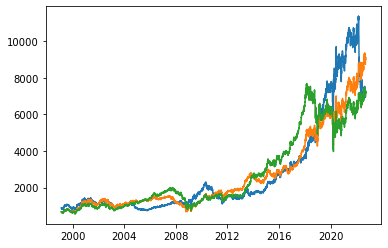

In [42]:
plt.plot(df_mu_sigma['VaR_2'])
plt.plot(df_mu_sigma['VaR_5'])
plt.plot(df_mu_sigma['VaR_10'])

In [45]:
for i in range(len(df_mu_sigma)):
    
    v0 = 134 * ba_price[i] + 166 * noc_price[i]
    
    df_mu_sigma['ES_2'][i] = ES_gbm(v0, df_mu_sigma.iloc[i]['port_ges_mu2'], 
                                           df_mu_sigma.iloc[i]['port_ges_std2'], 
                                           5 / 252, 0.975)
    
    df_mu_sigma['ES_5'][i] = ES_gbm(v0, df_mu_sigma.iloc[i]['port_ges_mu5'], 
                                           df_mu_sigma.iloc[i]['port_ges_std5'], 
                                           5 / 252, 0.975) 
    
    df_mu_sigma['ES_10'][i] = ES_gbm(v0, df_mu_sigma.iloc[i]['port_ges_mu10'], 
                                           df_mu_sigma.iloc[i]['port_ges_std10'], 
                                           5 / 252, 0.975) 

/var/folders/sn/xxr4rfmj23100534fjn99hv80000gn/T/ipykernel_97008/2650603429.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mu_sigma['ES_2'][i] = ES_gbm(v0, df_mu_sigma.iloc[i]['port_ges_mu2'],
/var/folders/sn/xxr4rfmj23100534fjn99hv80000gn/T/ipykernel_97008/2650603429.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mu_sigma['ES_5'][i] = ES_gbm(v0, df_mu_sigma.iloc[i]['port_ges_mu5'],
/var/folders/sn/xxr4rfmj23100534fjn99hv80000gn/T/ipykernel_97008/2650603429.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

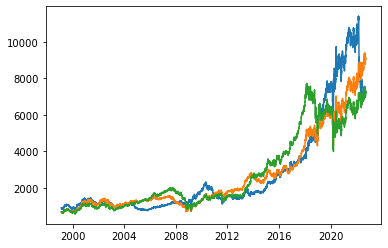

In [46]:
plt.plot(df_mu_sigma['ES_2'])
plt.plot(df_mu_sigma['ES_5'])
plt.plot(df_mu_sigma['ES_10'])

In [ ]:
# At the beginning ES and VaR seems more stable and becomes more noisy. There seems to be small deviations among the different time windows for ES and VaR.

In [125]:
# Calc ES and VaR for lambda1, lambda2 and lambda3

In [47]:
df_mu_sigma['VaR_l1'] = ''
df_mu_sigma['VaR_l2'] = ''
df_mu_sigma['VaR_l3'] = ''

df_mu_sigma['ES_l1'] = ''
df_mu_sigma['ES_l2'] = ''
df_mu_sigma['ES_l3'] = ''

/var/folders/sn/xxr4rfmj23100534fjn99hv80000gn/T/ipykernel_97008/35874357.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mu_sigma['VaR_l1'][i] = VaR_gbm(v0, df_mu_sigma.iloc[i]['exp_mu_1'],
/var/folders/sn/xxr4rfmj23100534fjn99hv80000gn/T/ipykernel_97008/35874357.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mu_sigma['VaR_l2'][i] = VaR_gbm(v0, df_mu_sigma.iloc[i]['exp_mu_2'],
/var/folders/sn/xxr4rfmj23100534fjn99hv80000gn/T/ipykernel_97008/35874357.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

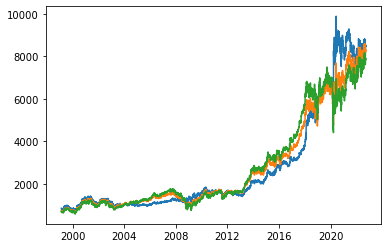

In [48]:
# VaR for exp weight lambda1, lambda2, lambda3

for i in range(len(df_mu_sigma)):
    
    v0 = 134 * ba_price[i] + 166 * noc_price[i]
    
    df_mu_sigma['VaR_l1'][i] = VaR_gbm(v0, df_mu_sigma.iloc[i]['exp_mu_1'], 
                                           df_mu_sigma.iloc[i]['exp_std_1'], 
                                           5 / 252, 0.99)
    
    df_mu_sigma['VaR_l2'][i] = VaR_gbm(v0, df_mu_sigma.iloc[i]['exp_mu_2'], 
                                           df_mu_sigma.iloc[i]['exp_std_2'], 
                                           5 / 252, 0.99) 
    
    df_mu_sigma['VaR_l3'][i] = VaR_gbm(v0, df_mu_sigma.iloc[i]['exp_mu_3'], 
                                           df_mu_sigma.iloc[i]['exp_std_3'], 
                                           5 / 252, 0.99) 
    
plt.plot(df_mu_sigma['VaR_l1'])
plt.plot(df_mu_sigma['VaR_l2'])
plt.plot(df_mu_sigma['VaR_l3'])

/var/folders/sn/xxr4rfmj23100534fjn99hv80000gn/T/ipykernel_97008/580135158.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mu_sigma['ES_l1'][i] = ES_gbm(v0, df_mu_sigma.iloc[i]['exp_mu_1'],
/var/folders/sn/xxr4rfmj23100534fjn99hv80000gn/T/ipykernel_97008/580135158.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mu_sigma['ES_l2'][i] = ES_gbm(v0, df_mu_sigma.iloc[i]['exp_mu_2'],
/var/folders/sn/xxr4rfmj23100534fjn99hv80000gn/T/ipykernel_97008/580135158.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydat

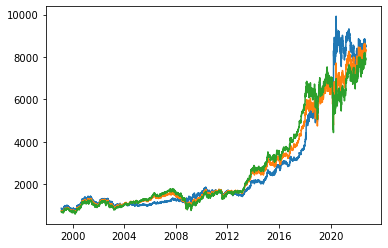

In [49]:
for i in range(len(df_mu_sigma)):
    
    v0 = 134 * ba_price[i] + 166 * noc_price[i]
    
    df_mu_sigma['ES_l1'][i] = ES_gbm(v0, df_mu_sigma.iloc[i]['exp_mu_1'], 
                                           df_mu_sigma.iloc[i]['exp_std_1'], 
                                           5 / 252, 0.975)
    
    df_mu_sigma['ES_l2'][i] = ES_gbm(v0, df_mu_sigma.iloc[i]['exp_mu_2'], 
                                           df_mu_sigma.iloc[i]['exp_std_2'], 
                                           5 / 252, 0.975) 
    
    df_mu_sigma['ES_l3'][i] = ES_gbm(v0, df_mu_sigma.iloc[i]['exp_mu_3'], 
                                           df_mu_sigma.iloc[i]['exp_std_3'], 
                                           5 / 252, 0.975) 
    
plt.plot(df_mu_sigma['ES_l1'])
plt.plot(df_mu_sigma['ES_l2'])
plt.plot(df_mu_sigma['ES_l3'])

In [ ]:
# Here it seems that VaR and ES for lambda estimates are very close to each other. 

# 2.2) -> Second approach 

## Normalized port

In [117]:
BA = pd.read_csv('BA-bloomberg.csv')
NOC = pd.read_csv('NOC-bloomberg.csv')

sampl_size_ba = len(BA)
sampl_size_noc = len(NOC)

# transform dates
BA['Dates'] = [datetime.datetime.strptime(d, '%m/%d/%Y').date() for d in BA["Dates"]]

# calc log returns 
BA['BA_daily_return'] = BA['PX_LAST']- BA['PX_LAST'].shift(-1)
BA['BA_log_return_daily'] = np.log(BA['PX_LAST'])-np.log(BA['PX_LAST'].shift(-1))

# transform dates
NOC['Dates'] = [datetime.datetime.strptime(d, '%m/%d/%Y').date() for d in NOC["Dates"]]

# calc log returns 
NOC['NOC_daily_return'] = NOC['PX_LAST']- NOC['PX_LAST'].shift(-1)
NOC['NOC_log_return_daily'] = np.log(NOC['PX_LAST'])-np.log(NOC['PX_LAST'].shift(-1))

In [118]:
total = pd.merge(BA, NOC, on='Dates', how='inner',suffixes=('_BA', '_NOC'))

In [119]:
def plot_last_l_years (s,l):
    Today = s.iloc[0,].Dates
    year = Today.year
    last = year - 24
    last_day = str(last)+str(Today)[4:10]
    last_day  = datetime.datetime.strptime(last_day,'%Y-%m-%d').date()
    trunc_data_t = s[(s['Dates']> last_day) & (s['Dates']<= Today )].Dates
    return trunc_data_t

In [120]:
def normalized_variance(s,t,l):
    Today = t
    start_date = (Today + relativedelta(years=-1*l))
    trunc_data = s[(s['Dates']> start_date) & (s['Dates']<= t )]
    length = len(trunc_data)
    
    arithmatic = trunc_data.BA_daily_return.mean()
    log_mean = trunc_data.BA_log_return_daily.mean()
    
    sd_arith = np.sqrt(1/length*sum(trunc_data.BA_daily_return**2)-arithmatic**2)
    sd_log = np.sqrt(1/length*sum(trunc_data.BA_log_return_daily**2)-log_mean**2)
    
    sigma_GBM = sd_log/np.sqrt(1/252)
    mu_GBM = log_mean*252+sigma_GBM**2/2
    
    arithmatic_2 = trunc_data.NOC_daily_return.mean()
    log_mean_2 = trunc_data.NOC_log_return_daily.mean()
    
    sd_arith_2 = np.sqrt(1/length*sum(trunc_data.NOC_daily_return**2)-arithmatic_2**2)
    sd_log_2 = np.sqrt(1/length*sum(trunc_data.NOC_log_return_daily**2)-log_mean_2**2)
    
    sigma_GBM_2 = sd_log_2/np.sqrt(1/252)
    mu_GBM_2 = log_mean*252+sigma_GBM**2/2
    
    correlation = trunc_data['PX_LAST_NOC'].corr(trunc_data['PX_LAST_BA'])
    t = 5/252
    s_ba = (list(trunc_data['PX_LAST_BA']))[0]
    s_noc = (list(trunc_data['PX_LAST_NOC']))[0]
    
    v0 = 134*s_ba +166*s_noc
    
    E_134_s_ba = 134*s_ba*np.exp(mu_GBM*t)
    E_166_s_noc = 166*s_noc*np.exp(mu_GBM_2*t)
    
    E_vt = E_134_s_ba +E_166_s_noc
    
    E_134square_s_ba_square = 134**2*s_ba**2*np.exp((2*mu_GBM+sigma_GBM**2)*t)
    E_166square_s_noc_square = 166**2*s_noc**2*np.exp((2*mu_GBM_2+sigma_GBM_2**2)*t)
    E_s1_s2 = s_ba*s_noc*np.exp((mu_GBM+mu_GBM_2+sigma_GBM*sigma_GBM_2*correlation)*t)
    
    E_vt_squared = E_134square_s_ba_square +E_166square_s_noc_square + 2*134*166*E_s1_s2
    var_vt = E_vt_squared - E_vt**2
    
    VaR = v0 - (E_vt-2.326*np.sqrt(var_vt))
    icdf = norm.ppf(0.975)
    es = v0 + np.sqrt(var_vt)*(norm.pdf(icdf)/(1-0.975))
    
    return VaR,es

In [123]:
var_list_2 = list()
es_list_2 = list()
for i in plot_last_l_years (total,2):

    var_vt,es = normalized_variance(total,i,2)
    var_list_2.append(var_vt)
    es_list_2.append(es)

var_list_5 = list()
es_list_5 = list()
for i in plot_last_l_years (total,5):

    var_vt,es = normalized_variance(total,i,5)
    var_list_5.append(var_vt)
    es_list_5.append(es)

var_list_10 = list()
es_list_10 = list()
for i in plot_last_l_years (total,10):

    var_vt,es = normalized_variance(total,i,10)
    var_list_10.append(var_vt)
    es_list_10.append(es)

array([[<AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
        <AxesSubplot:xlabel='Time'>],
       [<AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
        <AxesSubplot:xlabel='Time'>]], dtype=object)

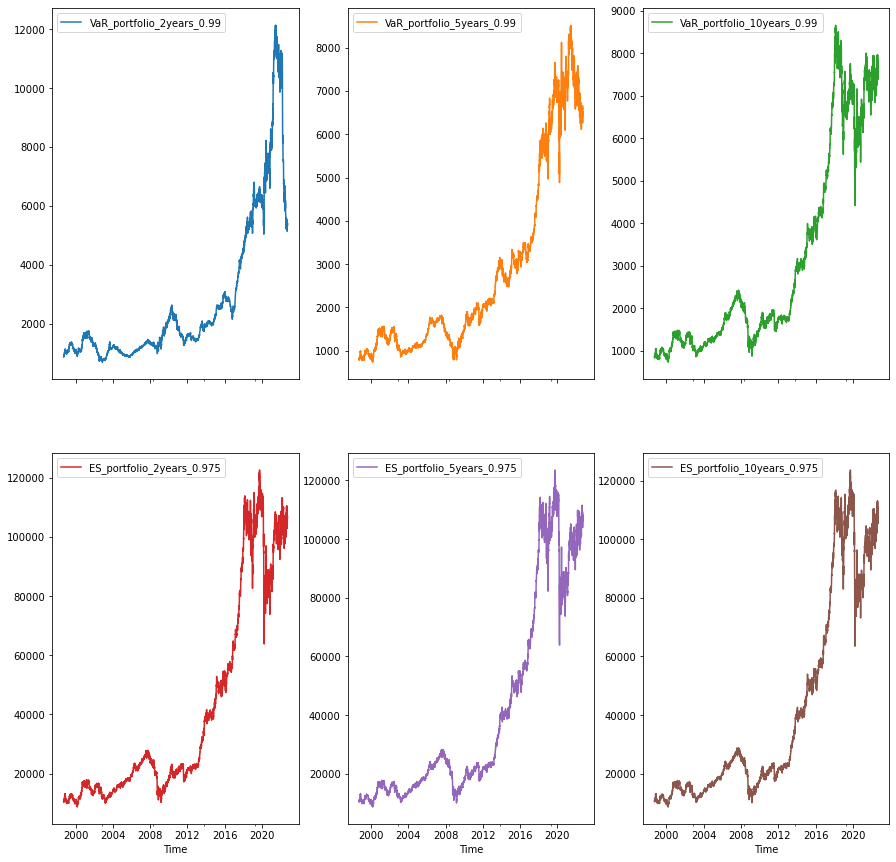

In [124]:
data_portfolio = {'Time':plot_last_l_years (total,2), 'VaR_portfolio_2years_0.99':var_list_2, 
                  'VaR_portfolio_5years_0.99': var_list_5, 'VaR_portfolio_10years_0.99':var_list_10, 
                  'ES_portfolio_2years_0.975': es_list_2,'ES_portfolio_5years_0.975':es_list_5, 
                  'ES_portfolio_10years_0.975': es_list_10}
data_portfolio = pd.DataFrame(data_portfolio)
data_portfolio.index = data_portfolio['Time']
data_portfolio = data_portfolio.sort_index()
data_portfolio.plot(subplots=True,layout=(2,3),figsize=(15,15))

In [ ]:
# Same observation for normal Port. At the beginning stable and after that more noisy for the metrics.

# 3.)


In [100]:
# constant hazard rate
lambda_h = 0.0075

def prob_lambda(t):
    p = 1 - np.exp(-lambda_h * t)
    return p

In [101]:
p_6 = prob_lambda(6)
p_6

0.04400251816690004

In [102]:
p_4 = prob_lambda(4)
p_3 = prob_lambda(3)
p_diff = p_4 - p_3
p_diff

0.007305703644828188

# 4.)

In [73]:
def s(t):
    s = np.exp(-0.013 * t + 0.004)
    return s

In [74]:
def p(t):
    p = 0.013 * np.exp(-0.013 * t + 0.004)
    return p

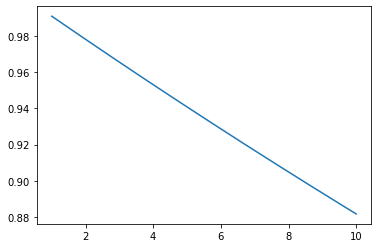

In [90]:
t = np.linspace(1,10,10000)
plt.plot(t,s(t))

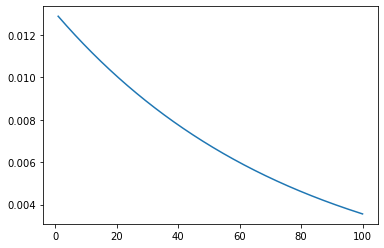

In [91]:
t = np.linspace(1,100,10000)
plt.plot(t,p(t))

In [94]:
R = 0.33

def spread(T):
    sp = - (1 / T) * np.log(1 - (1 - R) * (1 - s(T)))
    return sp

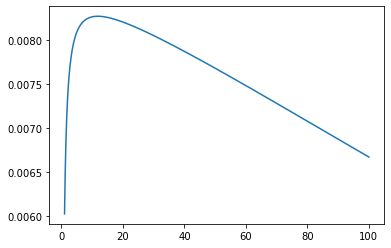

In [97]:
T = np.linspace(1,100,10000)
plt.plot(T,spread(T))